In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../')

import cv2
import numpy as np
import matplotlib.pyplot as plt

from lumivid.utils.video_utils import get_video, get_video_frame_iterator

DATA_PATH = '../data/'

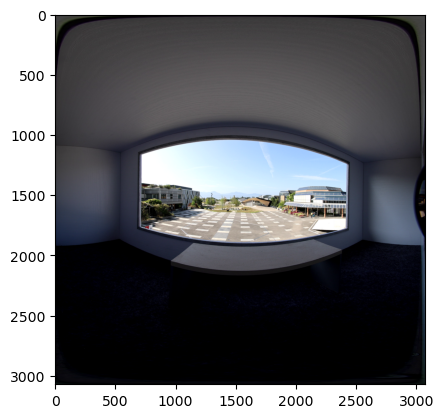

Resolution: (3072, 3072, 3)


In [7]:
video_path = DATA_PATH + f"preprocessing/raw_scenes/P1Scene01.mp4"
video = get_video(video_path)
frame = next(get_video_frame_iterator(video))[0][:, :, ::-1]

plt.imshow(frame)
plt.show()

print(f"Resolution: {frame.shape}")

alpha_u: 443.73333333333335
alpha_v: 665.6


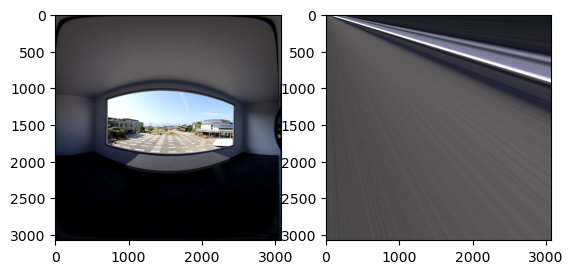

: 

In [24]:
H_res = 3072 # px
W_res = 3072 # px
H_sen = 24 # mm
W_sen = 36 # mm
f = 5.2 # mm

alpha_u = f * W_res / W_sen
alpha_v = f * H_res / H_sen

print(f"alpha_u: {alpha_u}")
print(f"alpha_v: {alpha_v}")

K = np.array([
    [alpha_u, 0, W_res / 2],
    [0, alpha_v, H_res / 2],
    [0, 0, 1]
])

# Dummy distortion coefficients
D = np.array([-0.9, 0.0, 0.0, 0.0])

undistorted_frame = cv2.fisheye.undistortImage(frame, K, D)

plt.subplot(1, 2, 1)
plt.imshow(frame)
plt.subplot(1, 2, 2)
plt.imshow(undistorted_frame)
plt.show()

In [ ]:
# import cv2
# import numpy as np

# CHECKERBOARD = (6,9)
# subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
# calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_CHECK_COND+cv2.fisheye.CALIB_FIX_SKEW
# objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
# objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
# _img_shape = None
# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane.

# # Assuming you have multiple images stored in 'images' list
# for img in images:
#     if _img_shape == None:
#         _img_shape = img.shape[:2]
#     else:
#         assert _img_shape == img.shape[:2], "All images must share the same size."

#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
#     if ret == True:
#         objpoints.append(objp)
#         cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
#         imgpoints.append(corners)

# N_OK = len(objpoints)
# K = np.zeros((3, 3))
# D = np.zeros((4, 1))
# rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
# tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
# rms, _, _, _, _ = cv2.fisheye.calibrate(objpoints,imgpoints,gray.shape[::-1],K,D,flags=calibration_flags)
# print("Found " + str(N_OK) + " valid images for calibration")
# print("DIM=" + str(_img_shape[::-1]))
# print("K=np.array(" + str(K.tolist()) + ")")
# print("D=np.array(" + str(D.tolist()) + ")")